In [37]:
!pip install nltk wordcloud

In [38]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

from wordcloud import WordCloud

# Download stopwords and punkt
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
df= pd.read_csv('Dataset/Review_Details.csv')
df

,author,star,review_title,review_date,Text,ProductLink
0,Anoop Mishra,5.0 out of 5 stars,Superb Product,Reviewed in India on 31 March 2024,Excellent product everyone who is fondof tshir...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,Sorry you have sent wrong product. So I have r...,4.0 out of 5 stars,Good product.,Reviewed in India on 9 May 2024,Colour combination is good but product quality...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,shereef p,3.0 out of 5 stars,Medium quality only,Reviewed in India on 23 February 2024,I started my usage just 2day back and only one...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,Very nice and comfortable,5.0 out of 5 stars,Very nice,Reviewed in India on 26 December 2023,Cloth fabric is comfortable to the person whom...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,KOTEE_CHATLA,4.0 out of 5 stars,Well fitted,Reviewed in India on 2 May 2024,Good quality 😄👍,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
...,...,...,...,...,...,...
505,SKP,5.0 out of 5 stars,Very nice,Reviewed in India on 21 September 2022,"Perfect, comfortable, value for money.",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
506,A.S.,5.0 out of 5 stars,Great product,Reviewed in India on 22 March 2022,Very nice material. It's light but it's not li...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
507,Tarun Babbar,4.0 out of 5 stars,Value for money,Reviewed in India on 5 May 2024,Good home wear tshirts,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
508,anjuchaubey,4.0 out of 5 stars,Value for money,Reviewed in India on 7 February 2024,Got my money's worth,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...


# Preprocessing

In [40]:
df.columns = ['rating' if col== 'star' else col.lower() for col in df.columns]
df.head()

,author,rating,review_title,review_date,text,productlink
0,Anoop Mishra,5.0 out of 5 stars,Superb Product,Reviewed in India on 31 March 2024,Excellent product everyone who is fondof tshir...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,Sorry you have sent wrong product. So I have r...,4.0 out of 5 stars,Good product.,Reviewed in India on 9 May 2024,Colour combination is good but product quality...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,shereef p,3.0 out of 5 stars,Medium quality only,Reviewed in India on 23 February 2024,I started my usage just 2day back and only one...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,Very nice and comfortable,5.0 out of 5 stars,Very nice,Reviewed in India on 26 December 2023,Cloth fabric is comfortable to the person whom...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,KOTEE_CHATLA,4.0 out of 5 stars,Well fitted,Reviewed in India on 2 May 2024,Good quality 😄👍,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...


In [41]:
df1 = df[['text', 'rating']]
df1

,text,rating
0,Excellent product everyone who is fondof tshir...,5.0 out of 5 stars
1,Colour combination is good but product quality...,4.0 out of 5 stars
2,I started my usage just 2day back and only one...,3.0 out of 5 stars
3,Cloth fabric is comfortable to the person whom...,5.0 out of 5 stars
4,Good quality 😄👍,4.0 out of 5 stars
...,...,...
505,"Perfect, comfortable, value for money.",5.0 out of 5 stars
506,Very nice material. It's light but it's not li...,5.0 out of 5 stars
507,Good home wear tshirts,4.0 out of 5 stars
508,Got my money's worth,4.0 out of 5 stars


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    510 non-null    object
 1   rating  510 non-null    object
dtypes: object(2)
memory usage: 8.1+ KB


In [43]:
df1['rating'].value_counts()

rating
5.0 out of 5 stars    199
4.0 out of 5 stars    153
3.0 out of 5 stars     77
1.0 out of 5 stars     53
2.0 out of 5 stars     28
Name: count, dtype: int64

In [44]:
df1['rating'] = df1.rating.apply(lambda x: float(x.split()[0]))
df1.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3652\2005343946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['rating'] = df1.rating.apply(lambda x: float(x.split()[0]))


,text,rating
0,Excellent product everyone who is fondof tshir...,5.0
1,Colour combination is good but product quality...,4.0
2,I started my usage just 2day back and only one...,3.0
3,Cloth fabric is comfortable to the person whom...,5.0
4,Good quality 😄👍,4.0


In [45]:
df1['label'] = df1.rating.apply(lambda x: 'positive' if  x>= 4 else 'negative')
df1.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3652\2385198256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['label'] = df1.rating.apply(lambda x: 'positive' if  x>= 4 else 'negative')


,text,rating,label
0,Excellent product everyone who is fondof tshir...,5.0,positive
1,Colour combination is good but product quality...,4.0,positive
2,I started my usage just 2day back and only one...,3.0,negative
3,Cloth fabric is comfortable to the person whom...,5.0,positive
4,Good quality 😄👍,4.0,positive


In [46]:
df1.label.value_counts()

label
positive    352
negative    158
Name: count, dtype: int64

In [47]:
df1.text = df1.text.str.lower()
df1.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3652\817430445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.text = df1.text.str.lower()


,text,rating,label
0,excellent product everyone who is fondof tshir...,5.0,positive
1,colour combination is good but product quality...,4.0,positive
2,i started my usage just 2day back and only one...,3.0,negative
3,cloth fabric is comfortable to the person whom...,5.0,positive
4,good quality 😄👍,4.0,positive


In [48]:
def clean_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Convert to lower case
    tokens = [word.lower() for word in tokens]
    
    # Remove punctuation
    tokens = [word for word in tokens if word.isalnum()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Rejoin tokens into a cleaned string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text


In [49]:
df1['cleaned_review'] = df1['text'].apply(clean_text)
df1

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3652\2988577347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cleaned_review'] = df1['text'].apply(clean_text)


,text,rating,label,cleaned_review
0,excellent product everyone who is fondof tshir...,5.0,positive,excellent product everyone fondof tshirt must ...
1,colour combination is good but product quality...,4.0,positive,colour combination good product quality less cost
2,i started my usage just 2day back and only one...,3.0,negative,started usage 2day back one wadh view produt m...
3,cloth fabric is comfortable to the person whom...,5.0,positive,cloth fabric comfortable person go worth money
4,good quality 😄👍,4.0,positive,good quality
...,...,...,...,...
505,"perfect, comfortable, value for money.",5.0,positive,perfect comfortable value money
506,very nice material. it's light but it's not li...,5.0,positive,nice material light like see types low quality...
507,good home wear tshirts,4.0,positive,good home wear tshirts
508,got my money's worth,4.0,positive,got money worth


In [60]:
positive =df1[df1['label']=='positive']['cleaned_review'].explode().values
negative = df1[df1['label']=='negative']['cleaned_review'].explode().values

In [61]:
positive = ' '.join(positive)
negative = ' '.join(negative)
positive

'excellent product everyone fondof tshirt must try nice fabrics colour comfortable fit colour combination good product quality less cost cloth fabric comfortable person go worth money good quality excellent product good cost increasing nice shirt shrink wash loss colour even win win thing wear daily use till good product good price sale got 400 good one good quality colour like display nice quality fit soft cotton normal quality expect premium level great quality fabric perfect fitting fabric good fitting awesome good buy worth issue wear size appropriate could due wrong labelling something nice comfortable polo amazon reduced length good purchased first time polo shirt long prefer buy size offline size also fits size issues buy regular size compare offline fit perfect cloth good price light pink really good really great product comfortable go product quality colour fits well go super quality product good quality value money similar picture good fit fitting perfect n fabric sooo breath

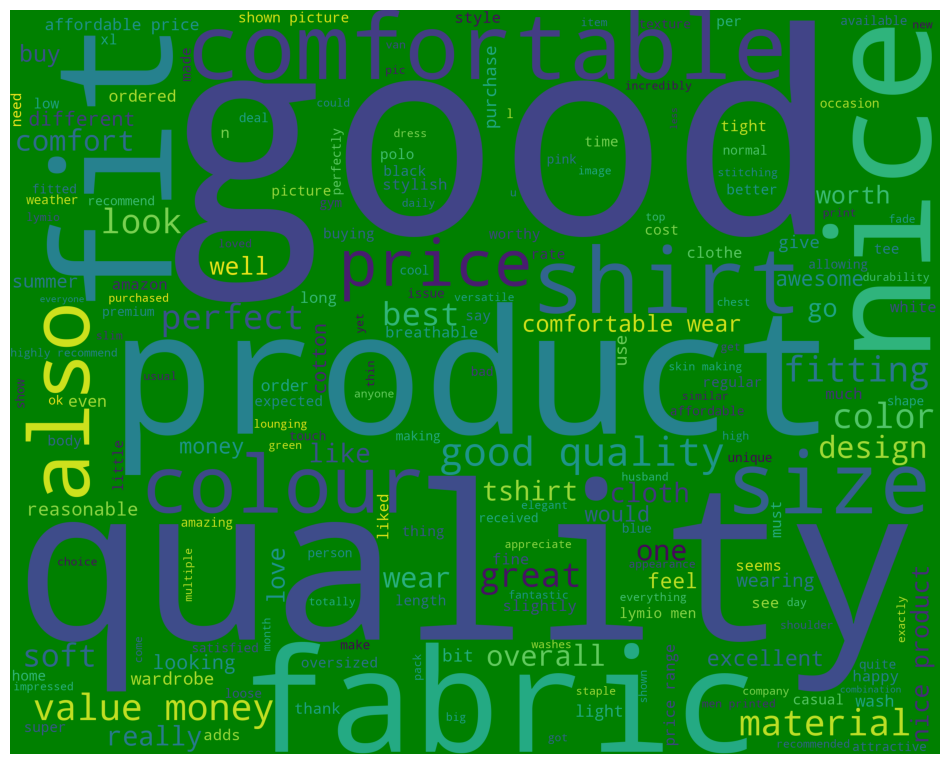

In [54]:
#Drawing World Cloud positive review

stopword = set(stopwords.words('english'))


wordcloud = WordCloud(stopwords=stopword,
                      background_color='green',
                      width=2500,
                      height=2000
                     ).generate(positive)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

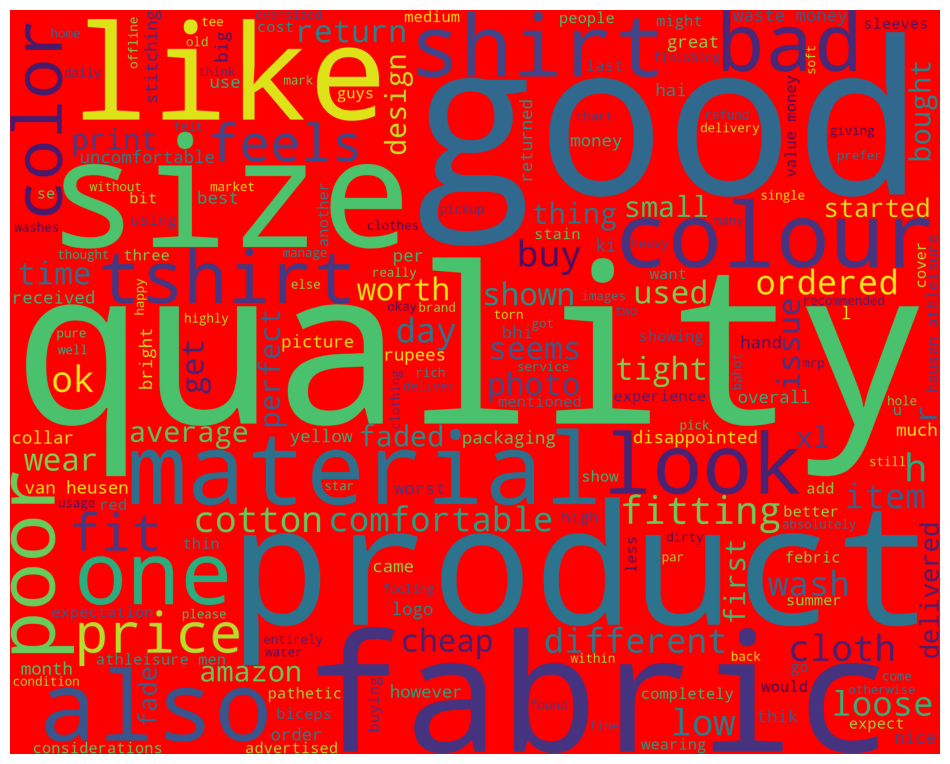

In [63]:
#Drawing World Cloud negative review
wordcloud = WordCloud(stopwords=stopword,
                      background_color='red',
                      width=2500,
                      height=2000
                     ).generate(negative)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()